# Image Classification with CNN


## Introduction

This notebook demonstrates image classification of cats and dogs using a Convolutional Neural Network (CNN). It includes:

1. **Data Augmentation:** Enhances image diversity for better model generalization.
2. **Model Building:** Utilizes VGG16 with additional layers for feature extraction and classification.
3. **Training:** Includes early stopping to prevent overfitting and optimize performance.
4. **Evaluation:** Assesses model accuracy and visualizes training results.

The goal is to build and train an effective image classifier with improved accuracy using TensorFlow and Keras.


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [11]:
# Set the Directory Paths
base_dir = "D:/DEPI/ML/assignments/10"
cats_dir = os.path.join(base_dir, "cats")
dogs_dir = os.path.join(base_dir, "dogs")

In [12]:
# Check the Number of Images in Each Class
num_cats = len(os.listdir(cats_dir))
num_dogs = len(os.listdir(dogs_dir))

print(f"Number of cat images: {num_cats}")
print(f"Number of dog images: {num_dogs}")


Number of cat images: 1885
Number of dog images: 1440


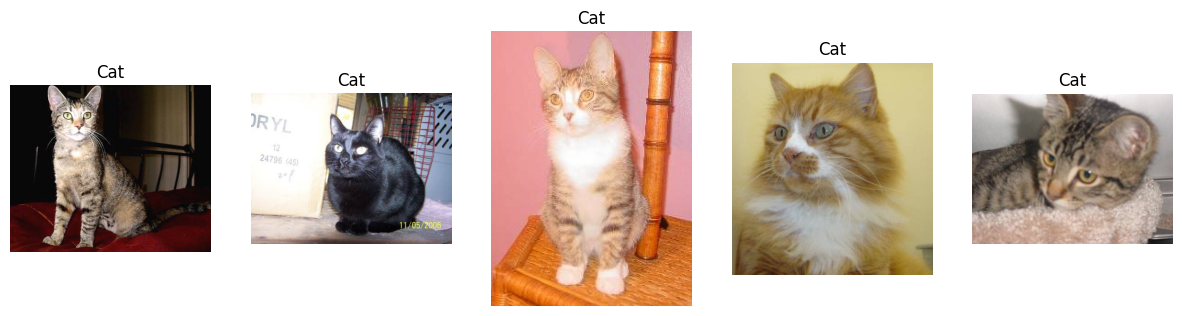

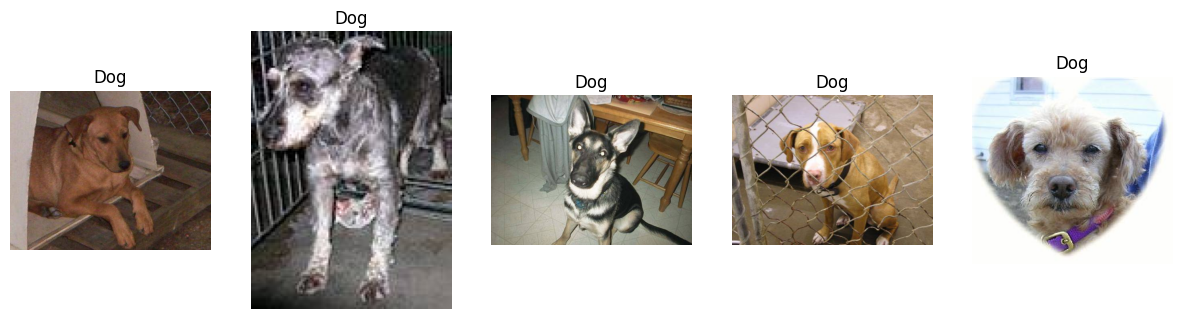

In [13]:
# Visualize a Few Sample Images
def show_sample_images(image_dir, label, num_images=5):
    plt.figure(figsize=(15, 10))
    images = os.listdir(image_dir)[:num_images]
    for i, img_name in enumerate(images):
        img_path = os.path.join(image_dir, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Show sample images from both classes
show_sample_images(cats_dir, "Cat")
show_sample_images(dogs_dir, "Dog")

In [14]:
# Analyze Image Sizes
def analyze_image_sizes(image_dir):
    widths = []
    heights = []
    
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    
    return widths, heights

# Analyze the image sizes for both classes
cat_widths, cat_heights = analyze_image_sizes(cats_dir)
dog_widths, dog_heights = analyze_image_sizes(dogs_dir)

# Combine sizes for analysis
all_widths = cat_widths + dog_widths
all_heights = cat_heights + dog_heights

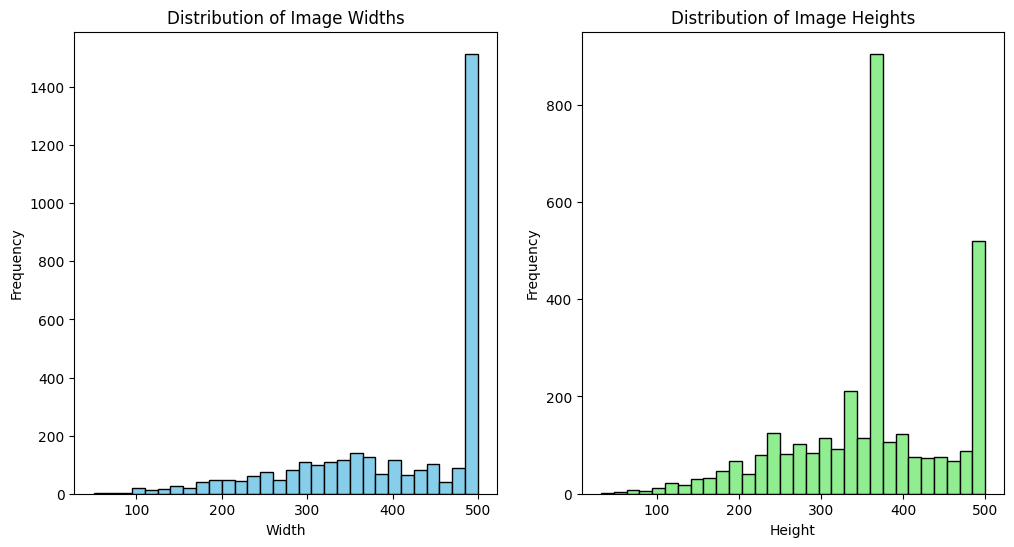

In [15]:
# Visualize the Distribution of Image Sizes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(all_widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(all_heights, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.show()

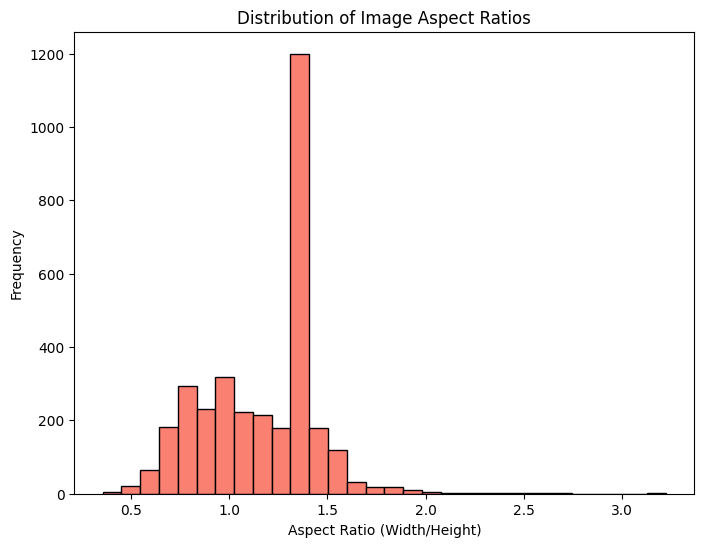

In [16]:
# Analyze Aspect Ratios
aspect_ratios = np.array(all_widths) / np.array(all_heights)

plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()


## EDA Summary

### Class Distribution:
- **Number of Cat Images:** 1885
- **Number of Dog Images:** 1440
- The dataset has slightly more images of cats compared to dogs, with a total of 3325 images.

### Image Dimensions:
- **Most Common Width:** 500 pixels
- **Most Common Height:** 380 pixels
- The images in the dataset predominantly have a width of 500 pixels and a height of 380 pixels.

### Aspect Ratios:
- **Most Common Aspect Ratio:** 1.4 (Width/Height)
- The aspect ratio of 1.4 indicates that most images are slightly wider than they are tall.


## Set Up Data Augmentation and Load Data

In [26]:
# Define the paths to the data directories
train_dir = "D:/DEPI/ML/assignments/10"

# Set up ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load the data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2660 images belonging to 2 classes.
Found 665 images belonging to 2 classes.


## Build the CNN Model

In [27]:
# Load VGG16 pretrained model without the top layer
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


## Compile the Model

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Set Up Early Stopping

In [29]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


## Train the Model

In [30]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[early_stopping]
)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.5532 - loss: 0.6896 - val_accuracy: 0.7534 - val_loss: 0.5849
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.7019 - loss: 0.5891 - val_accuracy: 0.7398 - val_loss: 0.5413
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step - accuracy: 0.7503 - loss: 0.5285 - val_accuracy: 0.7865 - val_loss: 0.4870
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 393s 5s/step - accuracy: 0.7806 - loss: 0.4792 - val_accuracy: 0.7940 - val_loss: 0.4589
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step - accuracy: 0.7816 - loss: 0.4669 - val_accuracy: 0.8241 - val_loss: 0.4379
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step - accuracy: 0.8007 - loss: 0.4356 - val_accuracy: 0.8165 - val_loss: 0.4186
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 415s 5s/step - accuracy: 0.8032 - loss: 0.4257 - val_accuracy: 0.8316 - val_loss: 0.4030
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step - accuracy: 0.8224 - loss: 0.3999 - val_accuracy: 0.8481 - v

## Evaluate the Model

In [31]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8591 - loss: 0.3260
Validation Accuracy: 85.56%


# Save the model

In [33]:
# After training your model
# model.save('cnn_model.h5')
model.save('my_model.keras')

## Plot Training History

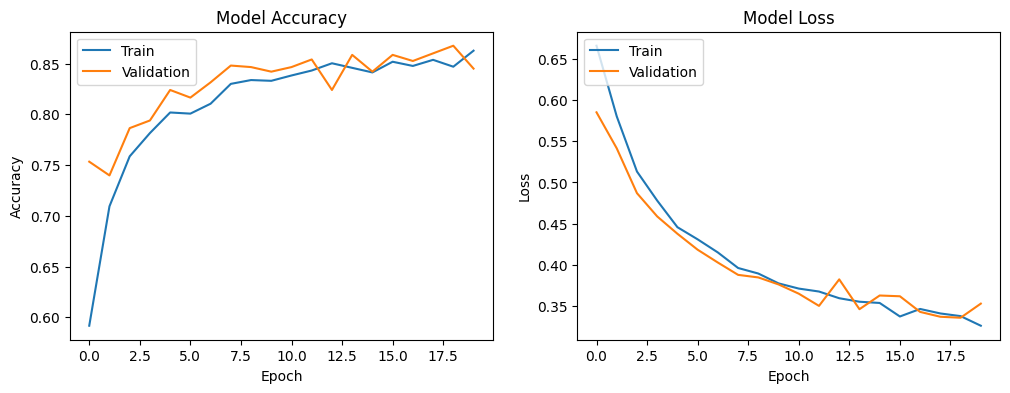

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()